<a href="https://colab.research.google.com/github/sugey-gi/edp1/blob/main/Membrana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

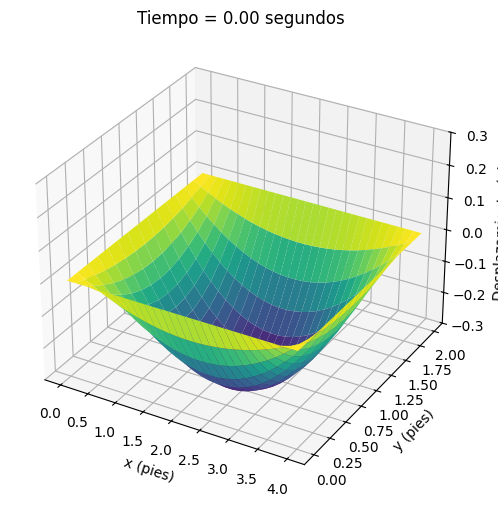

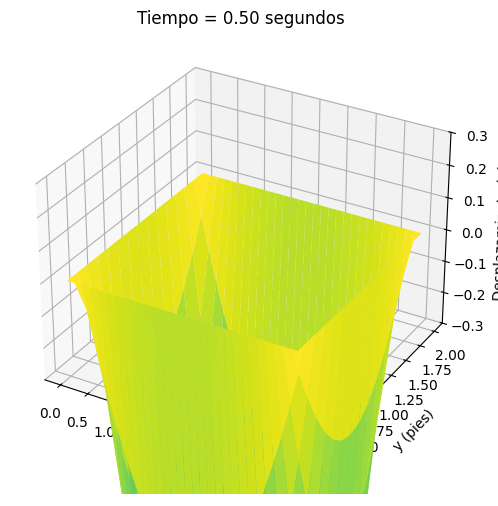

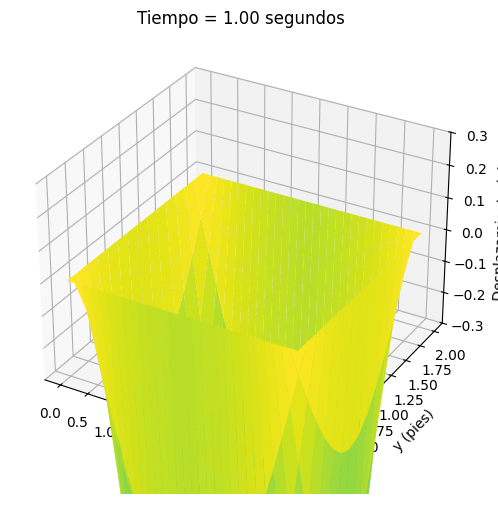

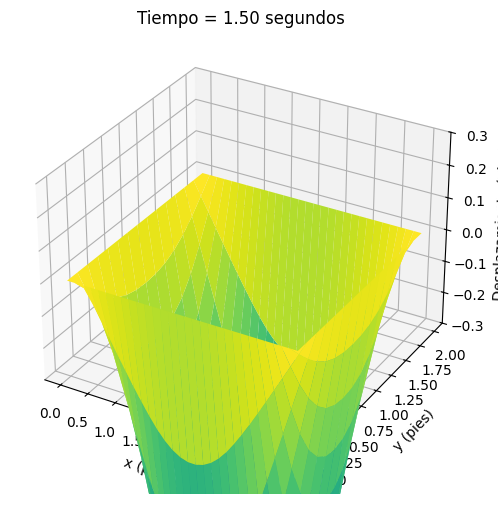

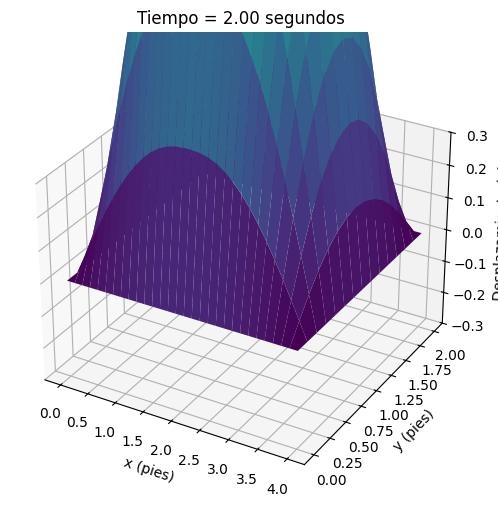

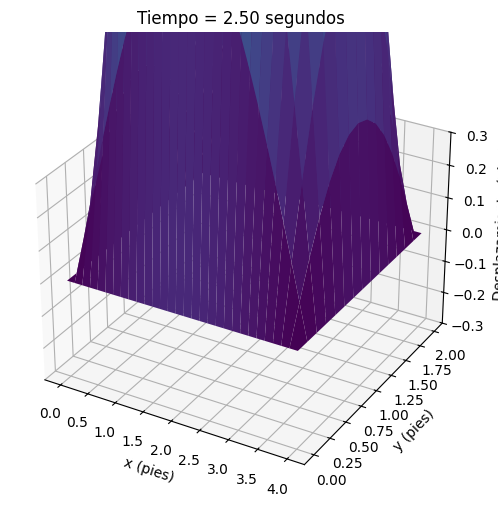

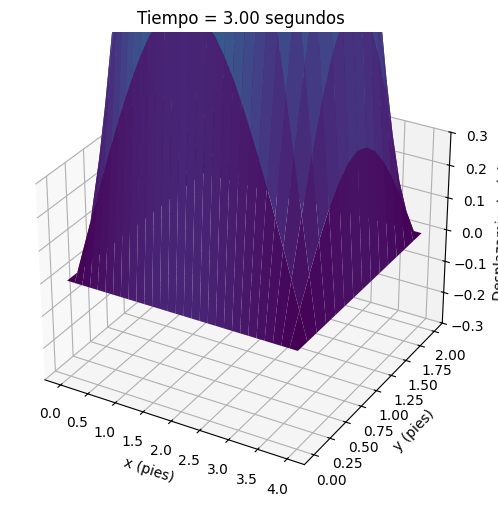

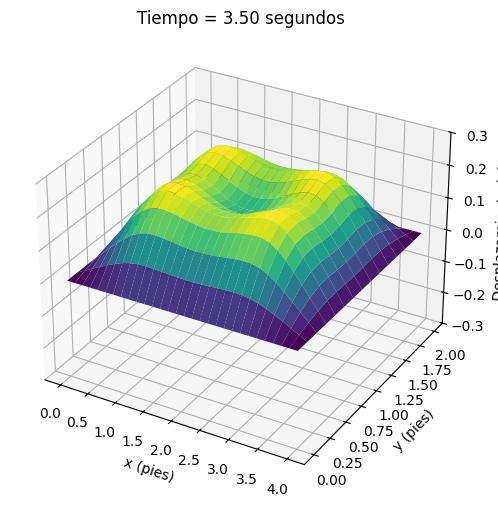

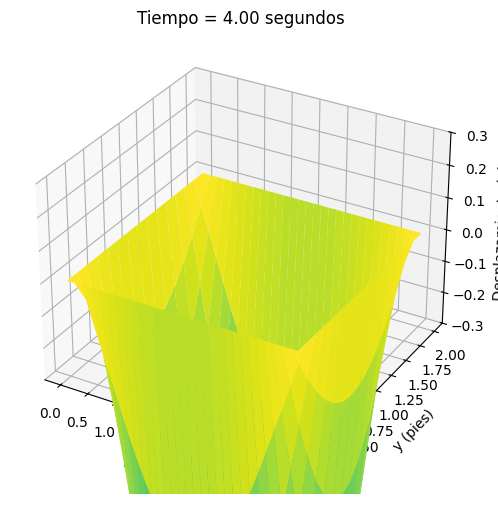

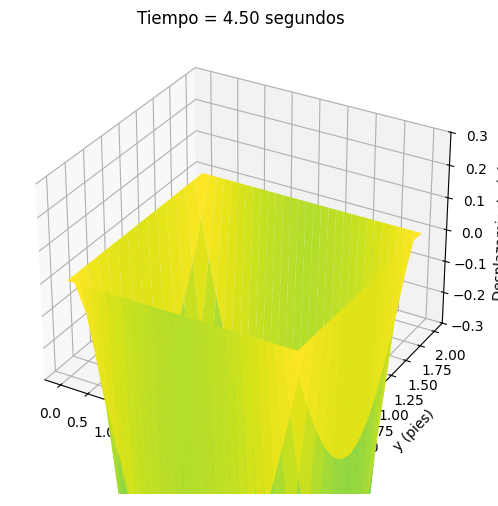

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Definimos los parámetros del problema
c = 1.0      # Velocidad de la onda
Lx = 4.0      # Longitud en x (de 0 a 4 pies)
Ly = 2.0      # Longitud en y (de 0 a 2 pies)
T = 5.0       # Tiempo total de simulación (segundos)

# 2. Definimos las condiciones iniciales
def f(x, y):
    """Desplazamiento inicial de la membrana"""
    return 0.1 * (4*x - x**2) * (2*y - y**2)

# Velocidad inicial g(x,y) = 0 (no hay movimiento inicial)

# 3. Creamos la malla de puntos
Nx = 30       # Número de puntos en x (puedes reducirlo para hacerlo más rápido)
Ny = 15       # Número de puntos en y
Nt = 100      # Número de pasos de tiempo

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# 4. Inicializamos la solución
u = np.zeros((Ny, Nx))  # Desplazamiento actual
u_prev = f(X, Y)        # Desplazamiento en el paso anterior
u_next = np.zeros((Ny, Nx))  # Desplazamiento en el siguiente paso

# 5. Calculamos los pasos espaciales y temporal
dx = x[1] - x[0]
dy = y[1] - y[0]
dt = T / Nt

# 6. Verificamos la condición de estabilidad
if dt > min(dx, dy)/c:
    dt = 0.9 * min(dx, dy)/c  # Ajustamos dt para que sea estable
    print(f"Se ajustó dt a {dt:.4f} para garantizar estabilidad")

# 7. Calculamos las constantes para el método
rx = (c * dt / dx)**2
ry = (c * dt / dy)**2

# 8. Iteramos en el tiempo
for n in range(Nt):
    # Calculamos el nuevo desplazamiento
    for i in range(1, Ny-1):
        for j in range(1, Nx-1):
            u_next[i,j] = 2*u[i,j] - u_prev[i,j] + \
                         rx*(u[i,j+1] - 2*u[i,j] + u[i,j-1]) + \
                         ry*(u[i+1,j] - 2*u[i,j] + u[i-1,j])

    # Aplicamos condiciones de frontera (u = 0 en los bordes)
    u_next[0,:] = 0
    u_next[-1,:] = 0
    u_next[:,0] = 0
    u_next[:,-1] = 0

    # Actualizamos para el siguiente paso
    u_prev = u.copy()
    u = u_next.copy()

    # Graficamos cada 10 pasos de tiempo
    if n % 10 == 0:
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, u, cmap='viridis')
        ax.set_title(f'Tiempo = {n*dt:.2f} segundos')
        ax.set_xlabel('x (pies)')
        ax.set_ylabel('y (pies)')
        ax.set_zlabel('Desplazamiento (pies)')
        ax.set_zlim(-0.5, 0.5)
        plt.show()

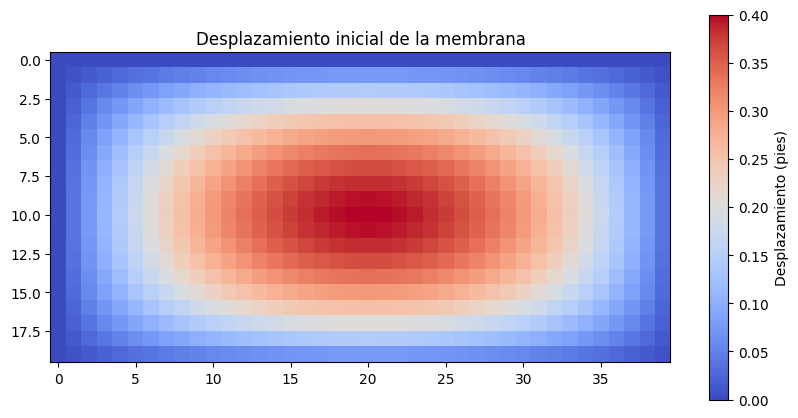

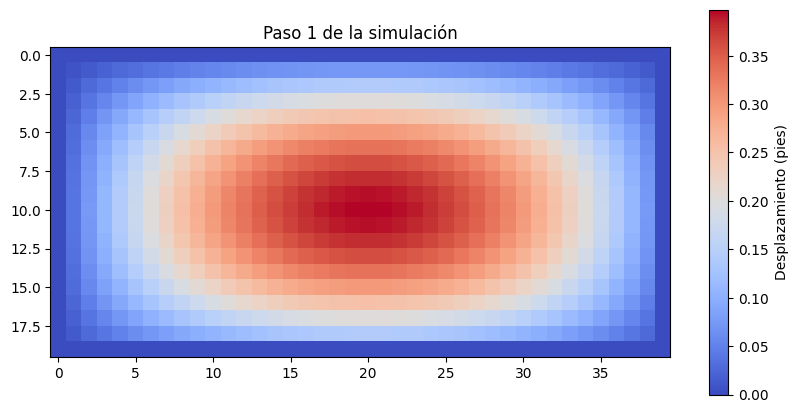

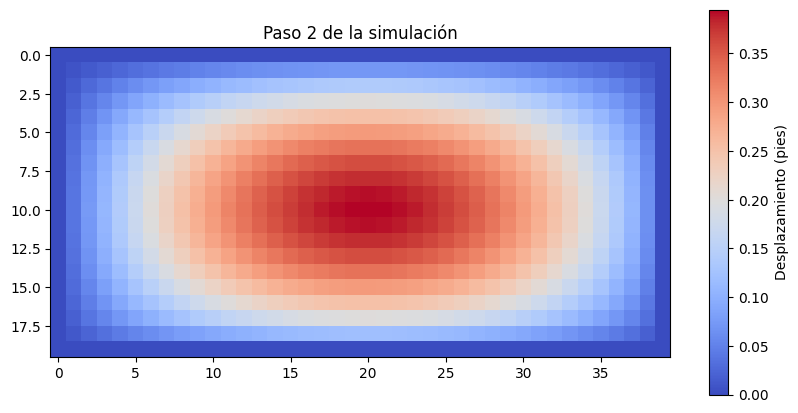

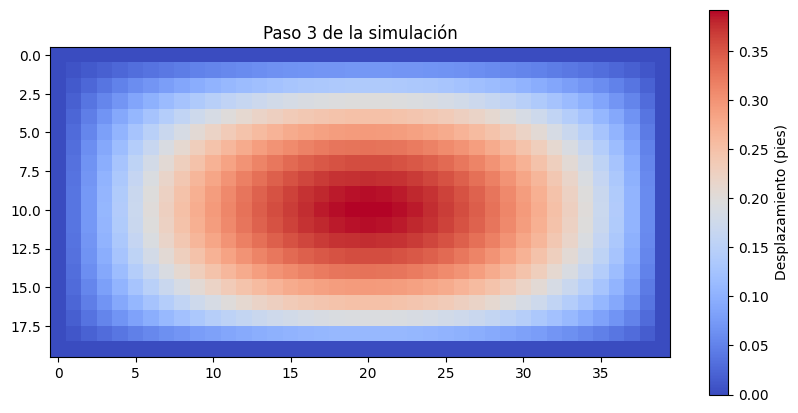

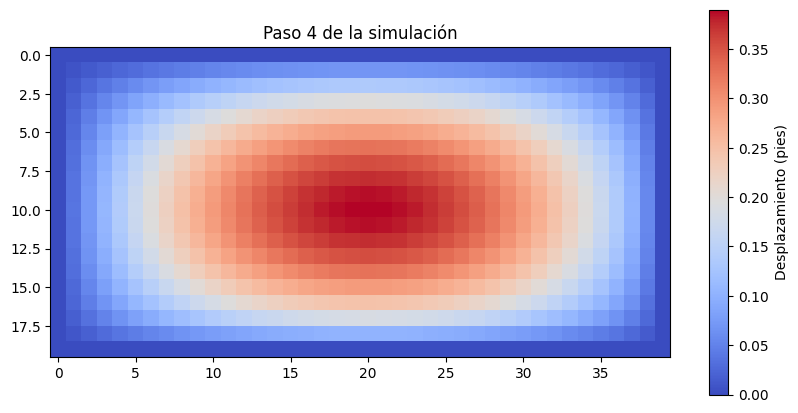

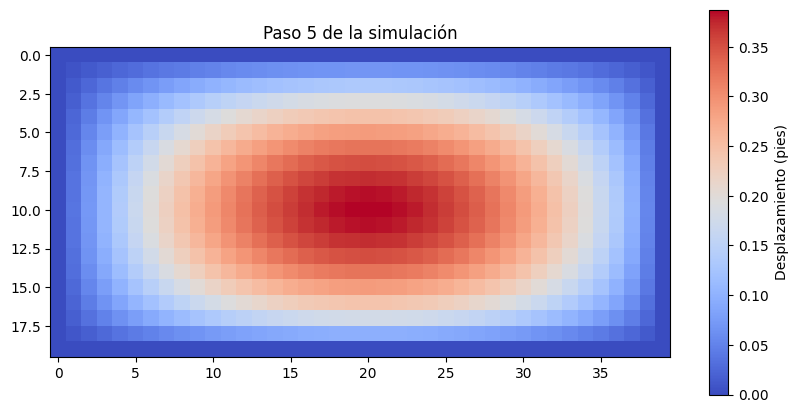

In [ ]:
vimport numpy as np
import matplotlib.pyplot as plt

# Tamaño de la membrana (4 pies x 2 pies)
filas = 20  # puntos en dirección y (más simple que Ny)
columnas = 40  # puntos en dirección x (más simple que Nx)

# Creamos la membrana inicial (todo en reposo)
membrana = np.zeros((filas, columnas))

# Desplazamiento inicial (simplificamos la fórmula)
for i in range(filas):
    for j in range(columnas):
        x = j/10  # x va de 0 a 4
        y = i/10  # y va de 0 a 2
        membrana[i,j] = 0.1*(4*x - x**2)*(2*y - y**2)

# Mostramos el estado inicial
plt.figure(figsize=(10,5))
plt.imshow(membrana, cmap='coolwarm')
plt.title("Desplazamiento inicial de la membrana")
plt.colorbar(label='Desplazamiento (pies)')
plt.show()

# Simulamos 5 pasos de tiempo (sin ecuaciones complicadas)
for paso in range(5):
    nueva_membrana = np.zeros((filas, columnas))

    # Calculamos el nuevo estado (versión simplificada)
    for i in range(1, filas-1):
        for j in range(1, columnas-1):
            # Promediamos los vecinos (esto hace que la onda se propague)
            nueva_membrana[i,j] = 0.25*(membrana[i+1,j] + membrana[i-1,j] +
                                     membrana[i,j+1] + membrana[i,j-1])

    # Mantenemos los bordes fijos
    nueva_membrana[0,:] = 0
    nueva_membrana[-1,:] = 0
    nueva_membrana[:,0] = 0
    nueva_membrana[:,-1] = 0

    # Actualizamos la membrana
    membrana = nueva_membrana.copy()

    # Mostramos el resultado
    plt.figure(figsize=(10,5))
    plt.imshow(membrana, cmap='coolwarm')
    plt.title(f"Paso {paso+1} de la simulación")
    plt.colorbar(label='Desplazamiento (pies)')
    plt.show()
